In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import sys
sys.path.append("../python/")
from helpers import *

import re
import random
import string

import datetime
import time
from PIL import Image

In [2]:
LABELED_IMAGES_DIR = '../../data/tidy/labeled-images'
image_list = os.listdir(LABELED_IMAGES_DIR)

In [37]:
def password_check(password):
    """
    Verify the strength of 'password'
    Returns a dict indicating the wrong criteria
    A password is considered strong if:
        8 characters length or more
        1 digit or more
        1 symbol or more
        1 uppercase letter or more
        1 lowercase letter or more
    """

    # calculating the length
    length_error = len(password) < 8

    # searching for digits
    digit_error = re.search(r"\d", password) is None

    # searching for uppercase
    uppercase_error = re.search(r"[A-Z]", password) is None

    # searching for lowercase
    lowercase_error = re.search(r"[a-z]", password) is None

    # searching for symbols
    symbol_error = re.search(r"[ !#$%&'()*+,-./[\\\]^_`{|}~"+r'"]', password) is None

    # overall result
    password_ok = not ( length_error or digit_error or uppercase_error or lowercase_error or symbol_error )

    return {
        'password_ok' : password_ok,
        'length_error' : length_error,
        'digit_error' : digit_error,
        'uppercase_error' : uppercase_error,
        'lowercase_error' : lowercase_error,
        'symbol_error' : symbol_error,
    }

In [38]:
def generate_random_id(N):
    s=''.join(random.SystemRandom().choice(string.printable + string.digits + string.ascii_lowercase) for _ in range(N))
    return s

In [40]:
password_check(generate_random_id(12))

{'password_ok': True,
 'length_error': False,
 'digit_error': False,
 'uppercase_error': False,
 'lowercase_error': False,
 'symbol_error': False}

In [24]:
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M')

In [36]:
print("timestamp: ", str(st), "\n")

timestamp:  2021-12-21 15:21 



In [26]:
type(st)

str

In [23]:
with open("../../logs/output_"+str(int(ts))+".txt", "a") as f:
    print("timestamp: ", st, "\n", file=f)

In [15]:
def testRandomEraser(cols=3, rows=3):
    img_num = cols * rows
    x = np.zeros((img_num, 64, 64, 3), dtype=np.uint8)
    print(len(x[0]))
    erased_images = []
#     eraser = get_random_eraser(pixel_level=True)
    print(x.shape)
    for i in range(img_num):
        for j in range(3):
            eraser = get_random_eraser(pixel_level=True)
            erased_image_array = eraser(x[i])#, interpolation="nearest")
            erased_images.append(erased_image_array)
    print(len(erased_images))
    subplot_args = { 'nrows': 3, 'ncols': 9, 'figsize': (50,50), 
                    'subplot_kw': {'xticks': [], 'yticks': []} }
    f, ax = plt.subplots(**subplot_args)
    f.tight_layout()
    for i in range(len(erased_images)):
        plt.subplot(3, 9, i + 1)
        plt.imshow(erased_images[i],interpolation="nearest")#eraser(erased_images[i]), interpolation="nearest")
        plt.axis('off')

64
(9, 64, 64, 3)
27


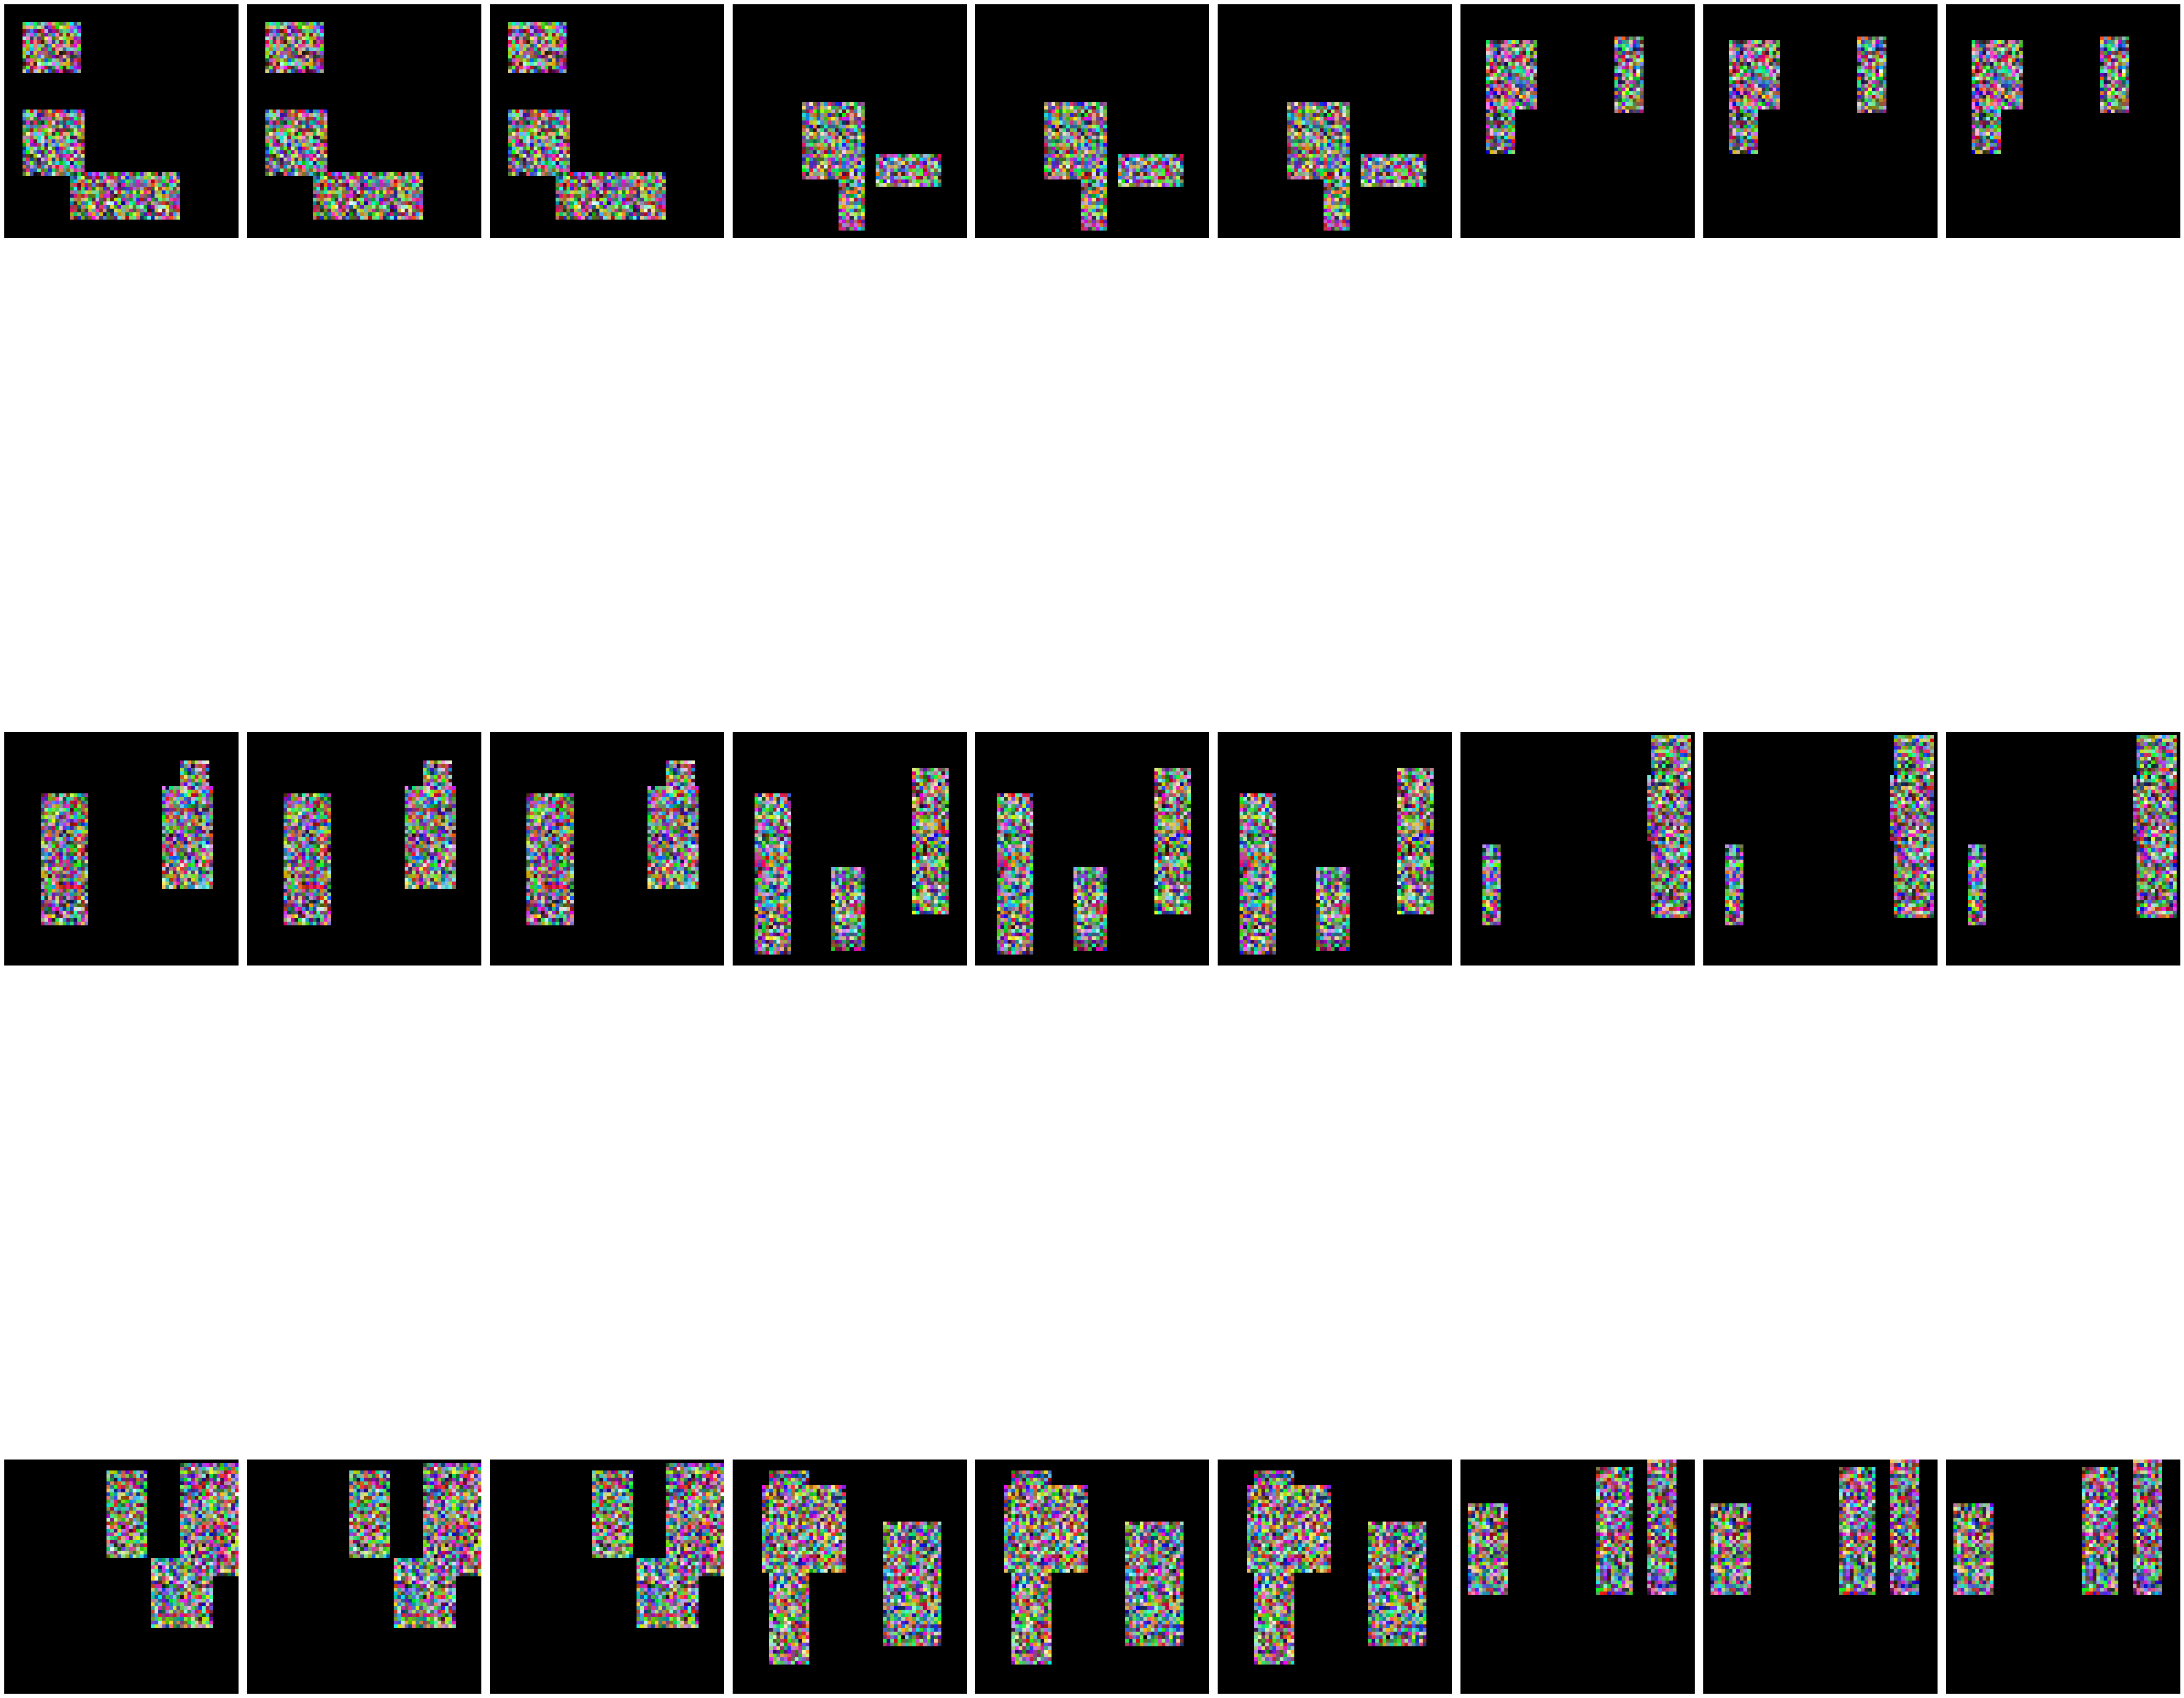

In [16]:
testRandomEraser()

In [7]:
l = []
w = 336
h = 336
for image_index in image_list[0:5]:
    path = os.path.join(LABELED_IMAGES_DIR, image_index)
    img = Image.open(path) 
    resized_image = img.resize((w, h), Image.BICUBIC) #resize the array
    resized_image = resized_image.transpose(Image.ROTATE_270) #rotate  clockwise
    resized_image_array = np.array(resized_image)/255. #regularize RGB values
#     print(resized_image_array.shape)
    erased_image_array = eraser(resized_image_array) #apply random erasing
    l.append(erased_image_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


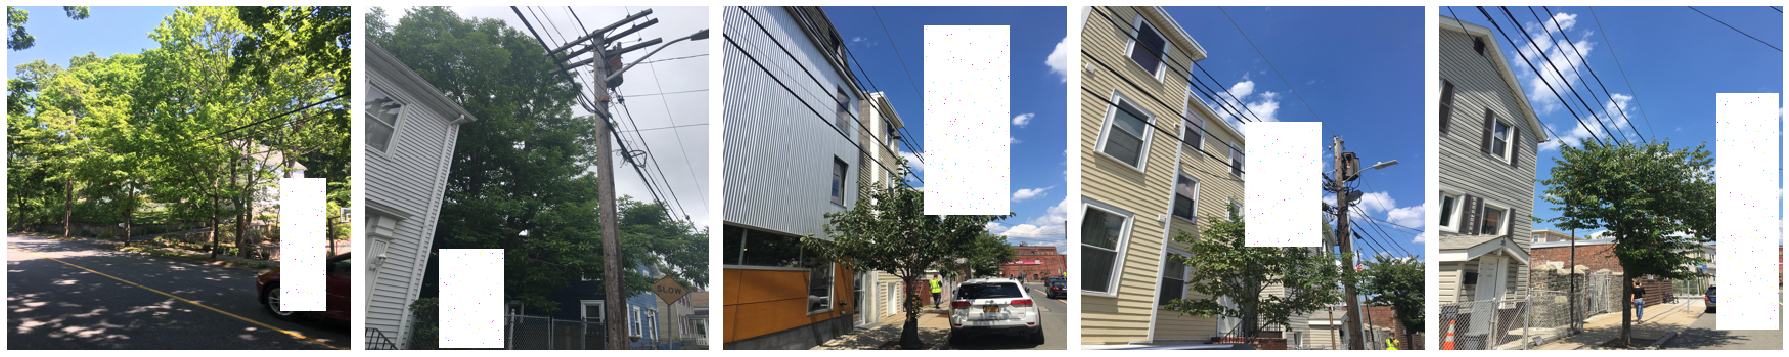

In [8]:
subplot_args = { 'nrows': 1, 'ncols': 5, 'figsize': (25,25), 
                    'subplot_kw': {'xticks': [], 'yticks': []} }   
f, ax = plt.subplots(**subplot_args)
f.tight_layout()
for i in range(len(l)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(l[i], interpolation="nearest")
    plt.axis('off')

## Classes

In [43]:
class Dog:
    family = "Canine"
 
    def __init__(self, name, breed):
	    self.name = name
	    self.breed = breed
        self.tricks = []
#         self.tricks = []
    
#     def add_tricks(self, x):
#         self.tricks.append(x)
        
#     def info(self, x):
#         self.add_tricks(x)
#         print(self.name+" is a "+self.breed+" that can "+self.tricks[0])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [47]:
class Car:
    previous_owners = []
    
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
                
    def set_owners(self, owner):
        self.previous_owners.append(owner)
        print("Owner: ", self.previous_owners[len(self.previous_owners)-1])
        
    def info(self):
        age = int(datetime.date.today().strftime("%Y")) - self.year
        print("This", self.make, self.model,"is", age, "old.")
        print("Previous owners: ")
        for o in self.previous_owners:
            print(o, " ")

In [48]:
car1 = Car("bmw", "i7", 2017)

In [49]:
car1.set_owners("John A")

Owner:  John A


In [50]:
car1.info()

This bmw i7 is 4 old.
Previous owners: 
John A  


In [82]:
t = [(len(image_list[0:5]),(np.array(resized_image)/255.).shape)]

In [83]:
r = [(w,x,y,z) for w, (x,y,z) in t]

In [158]:
r

[(5, 336, 336, 3)]

In [6]:
def eraser(input_img, p=1.0, s_l=0.01, s_h=0.05, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    """Regularizes the model by randomly masking parts of the training image with random values
    p : the probability that random erasing is performed
    s_l, s_h : minimum / maximum proportion of erased area against input image
    r_1, r_2 : minimum / maximum aspect ratio of erased area
    v_l, v_h : minimum / maximum value for erased area
    pixel_level : pixel-level randomization for erased area
    """
    if input_img.ndim == 3:
        img_h, img_w, img_c = input_img.shape
    elif input_img.ndim == 2:
        img_h, img_w = input_img.shape

    p_1 = np.random.rand()

    if p_1 > p:
        return input_img

    while True:
        s = np.random.uniform(s_l, s_h) * img_h * img_w
        r = np.random.uniform(r_1, r_2)
        w = int(np.sqrt(s / r))
        h = int(np.sqrt(s * r))
        left = np.random.randint(0, img_w)
        top = np.random.randint(0, img_h)

        if left + w <= img_w and top + h <= img_h:
            break

    if pixel_level:
        if input_img.ndim == 3:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        if input_img.ndim == 2:
            c = np.random.uniform(v_l, v_h, (h, w))
    else:
        c = np.random.uniform(v_l, v_h)

    output_img = np.copy(input_img)
    output_img[top:top + h, left:left + w] = c

    return output_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(336, 336, 3)
(336, 336, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


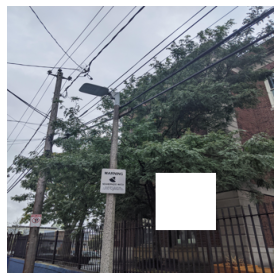

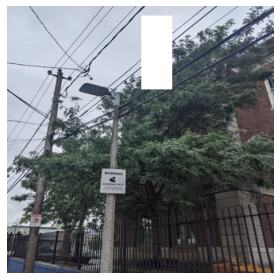

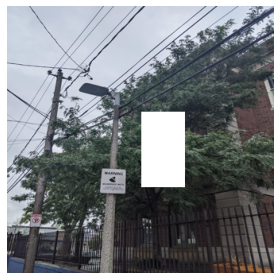

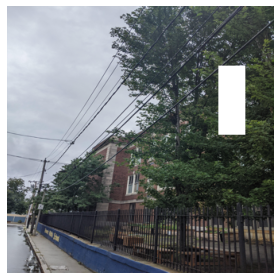

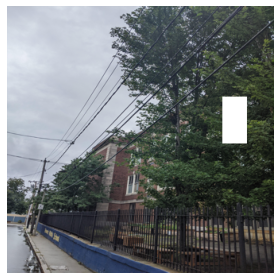

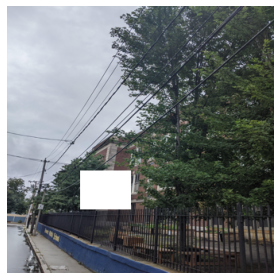

In [7]:
erased_imgs_list = []
w = 336
h = 336
for image_index in image_list[10:12]:
    path = os.path.join(LABELED_IMAGES_DIR, image_index)
    img = Image.open(path) 
    resized_image = img.resize((w, h), Image.BICUBIC) #resize the array
    resized_image = resized_image.transpose(Image.ROTATE_270) #rotate  clockwise
    resized_image_array= np.array(resized_image)/255. #regularize RGB values
    print(resized_image_array.shape)
    for i in range(3):
        erased_img_array = eraser(resized_image_array)   
        erased_imgs_list.append(erased_img_array)
        plt.figure()
        plt.imshow(erased_img_array)
        plt.axis('off')
        plt.tight_layout()
#         resized_image_array2 = resized_image_array1
#     repeated = [resized_image_array1,resized_image_array2]#,resized_image_array]
#     for i in range(len(repeated)):
#         erased_image_array = resized_image_array
        #pixel_level=True)
#         erased_img_array = eraser(i)
#         erased_img_array = eraser(i)
#     plt.figure()
#     plt.imshow(resized_image_array1)
#     erased_img_array1 = eraser(resized_image_array1)   
#     erased_imgs_list.append(erased_img_array1)
#     plt.figure()
#     plt.imshow(erased_img_array1)
#     plt.figure()
#     plt.imshow(resized_image_array2)

#     erased_img_array2 = eraser(resized_image_array2)
    
#     erased_imgs_list.append(erased_img_array2)
    
#     plt.figure()
#     plt.imshow(erased_img_array2)
#     plt.figure()
#     plt.imshow(resized_image_array1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


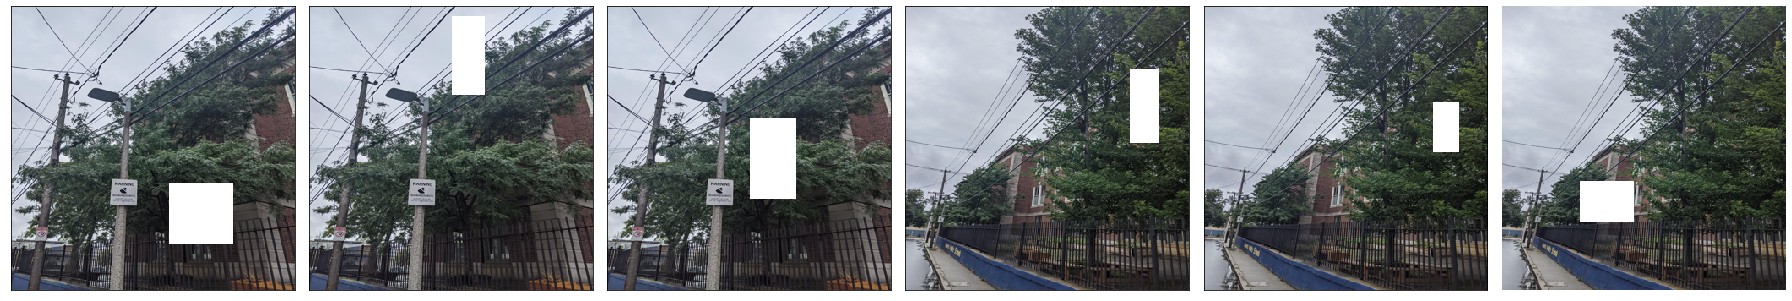

In [8]:
subplot_args = { 'nrows': 1, 'ncols': 6, 'figsize': (25,25), 
                    'subplot_kw': {'xticks': [], 'yticks': []} }   
f, ax = plt.subplots(**subplot_args)
for i in range(len(erased_imgs_list)):
    ax[i].imshow(erased_imgs_list[i], interpolation="nearest")
plt.axis('off')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


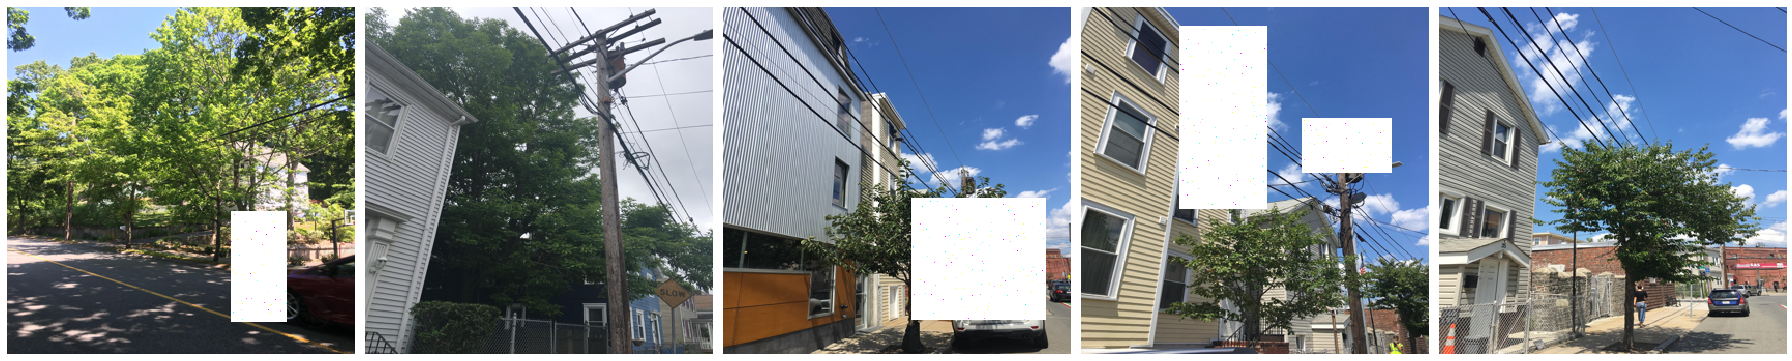

In [9]:
subplot_args = { 'nrows': 1, 'ncols': 5, 'figsize': (25,25), 
                    'subplot_kw': {'xticks': [], 'yticks': []} }   
f, ax = plt.subplots(**subplot_args)
f.tight_layout()
for i in range(len(l)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(eraser(np.array(l[i])), interpolation="nearest")
    plt.axis('off')
    plt.tight_layout()

In [109]:
if not os.path.exists("../../figures/occlusion/"):
    os.makedirs("../../figures/occlusion/")

In [131]:
f.savefig("../../figures/occlusion/occlusion-example.png")

In [124]:
f.tight_layout()

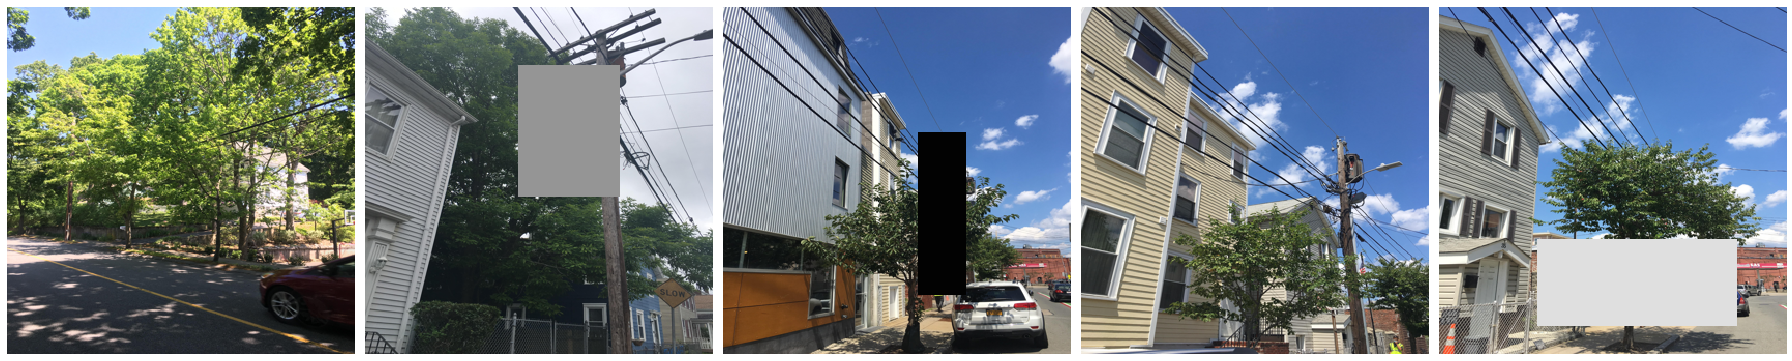